# **Euro to Inr Exchange rate prediciton using LSTM**

In [0]:
#import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from keras import optimizers
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
import keras.backend as K

import tqdm

**Dataset**
The dataset was collected from https://in.investing.com/currencies/eur-inr-historical-data. Create an account and download the dataset or just go to my github repository to collect the dataset.

In [0]:
a = pd.read_csv('data.csv')

In [139]:
df = a[['Date', 'Price']]
df.columns = ['date', 'price']
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.sort_values(by='date')
# df = df.reset_index(drop=True)
df.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,price
date,
2019-10-07,77.8675
2019-10-08,78.0285
2019-10-09,78.0260
2019-10-10,78.1635
2019-10-11,78.3215


In [140]:
df.iloc[3500]

price    67.592
Name: 2015-04-19 00:00:00, dtype: float64

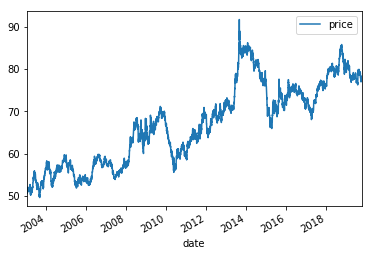

In [141]:
df.plot()

In [0]:
split_date = pd.Timestamp('2015-04-19')

In [0]:
train = df.loc[:split_date, ['price']]
test = df.loc[split_date:, ['price']]

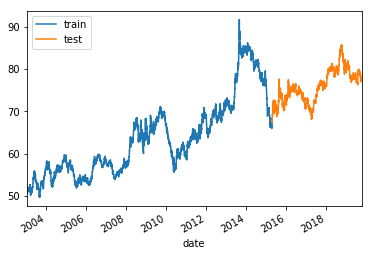

In [144]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [0]:
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [148]:
train_sc[:4]

array([[0.02659209],
       [0.02197047],
       [0.02290664],
       [0.02295404]])

In [147]:
train[:4]

,price
date,
2003-01-10,50.7115
2003-01-13,50.5165
2003-01-14,50.5560
2003-01-15,50.5580


In [0]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [150]:
train_sc.shape

(3501, 1)

In [151]:
y_train

array([[0.02197047],
       [0.02290664],
       [0.02295404],
       ...,
       [0.41413268],
       [0.4268125 ],
       [0.4266703 ]])

In [0]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [153]:
X_train_t.shape

(3500, 1, 1)

In [0]:
num_units = 4
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 60
num_epochs = 60

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(1, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model


In [158]:
regressor.fit(X_train_t, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/60
3500/3500 [==============================] - 5s 1ms/step - loss: 0.1037
Epoch 2/60
3500/3500 [==============================] - 0s 54us/step - loss: 0.0646
Epoch 3/60
3500/3500 [==============================] - 0s 58us/step - loss: 0.0519
Epoch 4/60
3500/3500 [==============================] - 0s 57us/step - loss: 0.0477
Epoch 5/60
3500/3500 [==============================] - 0s 59us/step - loss: 0.0456
Epoch 6/60
3500/3500 [==============================] - 0s 60us/step - loss: 0.0440
Epoch 7/60
3500/3500 [==============================] - 0s 59us/step - loss: 0.0425
Epoch 8/60
3500/3500 [==============================] - 0s 61us/step - loss: 0.0410
Epoch 9/60
3500/3500 [==============================] - 0s 59us/step - loss: 0.0396
Epoch 10/60
3500/3500 [==============================] - 0s 65us/step - loss: 0.0382
Epoch 11/60
3500/3500 [==============================] - 0s 57us/step - loss: 0.0368
Epoch 12/60
3500/3500 [==============================] - 0s 60us/step - los

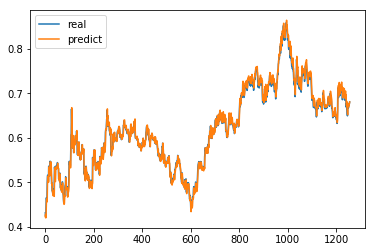

In [159]:
y_pred = regressor.predict(X_test_t)
plt.figure()
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['real', 'predict'])

In [0]:
regressor.save('model.h5')


In [0]:
from keras.models import load_model
model = load_model('model.h5')
def predict_torrmow():
    



    train = df[["price"]]
    sc = MinMaxScaler()

    train_sc = sc.fit_transform(train)
    X_train = train_sc[:-1]
    y_train = train_sc[1:]
    X_train_t = X_train[:, None]

    y_pred = model.predict(X_train_t)
    result = sc.inverse_transform(y_pred)[-2:]
    today = result[0][0]
    tomorrow =result[1][0]
    output = "flat"
    if tomorrow > today:
        output = "up"
    elif tomorrow < today:
        output = "down"
    return output, tomorrow

# Prediction for the next 30 days 

Create data_predicted.csv


In [0]:
# df3 =  pd.DataFrame(columns=["date","trend","price"])
# df3.to_csv('data_predicted.csv')

In [162]:
for i in range(30):

  sign, price = predict_torrmow()
  print(i)
  print(sign,price)

  x = pd.DatetimeIndex(df.iloc[-1:].index.values) + pd.DateOffset(1)
  ts = pd.to_datetime(x[0])
  tomorrow = ts.strftime('%Y-%m-%d')

  new_df = pd.DataFrame([[tomorrow,price]],columns=["date","price"])
  new_df['date'] = pd.to_datetime(new_df['date'])
  new_df = new_df.set_index('date')

  df = df.append(new_df)
  df["price"] = df["price"].astype(float)
  df.to_csv("data.csv")
  new_df_predict = pd.DataFrame([[tomorrow, sign, price]], columns=["date","trend","price"])
  df_predict = pd.read_csv("data_predicted.csv")
  if i>1:
    check_date = pd.DatetimeIndex(df_predict.iloc[-1:]["date"].values).strftime('%Y-%m-%d')[0]
  try:
      days = df.iloc[df.index.get_loc(check_date)-1: df.index.get_loc(check_date)+1]
  except:
      days = df.iloc[-2:]
  today_price = days.iloc[1]["price"]
  yesterday_price = days.iloc[0]["price"]
  real_sign = "flat"
  if today_price > yesterday_price:
      real_sign = "up"
  elif today_price < yesterday_price:
      real_sign = "down"
  df_predict = df_predict.append(new_df_predict, ignore_index=True, sort = True)
  df_predict.to_csv("data_predicted.csv", index=False)

0
up 78.318474
1
up 78.48368
2
down 78.48051
3
up 78.65333
4
down 78.65
5
up 78.83085
6
down 78.82736
7
up 79.016685
8
down 79.01303
9
up 79.21131
10
down 79.20748
11
up 79.41522
12
down 79.41121
13
up 79.62895
14
down 79.62475
15
up 79.85309
16
down 79.84868
17
up 80.08824
18
down 80.08361
19
up 80.33506
20
down 80.3302
21
up 80.59427
22
down 80.589165
23
up 80.86662
24
down 80.86126
25
up 81.15294
26
down 81.1473
27
up 81.4541
28
down 81.44817
29
up 81.75731


In [0]:
df.tail(10)

In [163]:
df_predict

,Unnamed: 0,date,price,trend
0,NaN,2019-10-13,77.298012,up
1,NaN,2019-10-14,76.207481,down
2,NaN,2019-10-15,76.344589,up
3,NaN,2019-10-16,75.329010,down
4,NaN,2019-10-17,75.456673,up
5,NaN,2019-10-18,74.511185,down
6,NaN,2019-10-19,74.630020,up
7,NaN,2019-10-20,73.750076,down
8,NaN,2019-10-21,73.860657,up
9,NaN,2019-10-22,73.042007,down
